In [1]:
import pandas as pd

1. 'beer_serving', 'spirit_serving', 'wine_serving', 'total_liters_of_pure_alcohol' 칼럼의 데이터 간의 상관관계 행렬 출력
2. 행렬 히트맵 시각화
3. 1번에 대한 4개의 칼럼 산점도 그래프 출력
4. 국가별 술 소비량 대비 알콜 비율 칼럼을 추가
5. 국가별 순위 시각화하여 출력

In [2]:
drinks = pd.read_csv("../../csv/drinks.csv")
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [6]:
# 상관계수 행렬 출력
cols = ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
corr = drinks[cols].corr(method = 'pearson')
corr

# 자기 자신과 비교하면 1이 출력됨

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


In [ ]:
# 행렬 히트맵 시각화 하기 위한 라이브러리 설치
!pip install seaborn

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

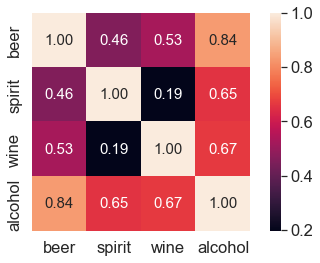

In [12]:
cols_view = ['beer', 'spirit', 'wine', 'alcohol']

sns.set(font_scale = 1.5)

hm = sns.heatmap(
    corr.values,
    cbar = True,
    annot = True,
    square = True,
    fmt = '.2f',
    annot_kws = {'size' : 15},
    yticklabels = cols_view,
    xticklabels = cols_view
)

plt.tight_layout()
plt.show()

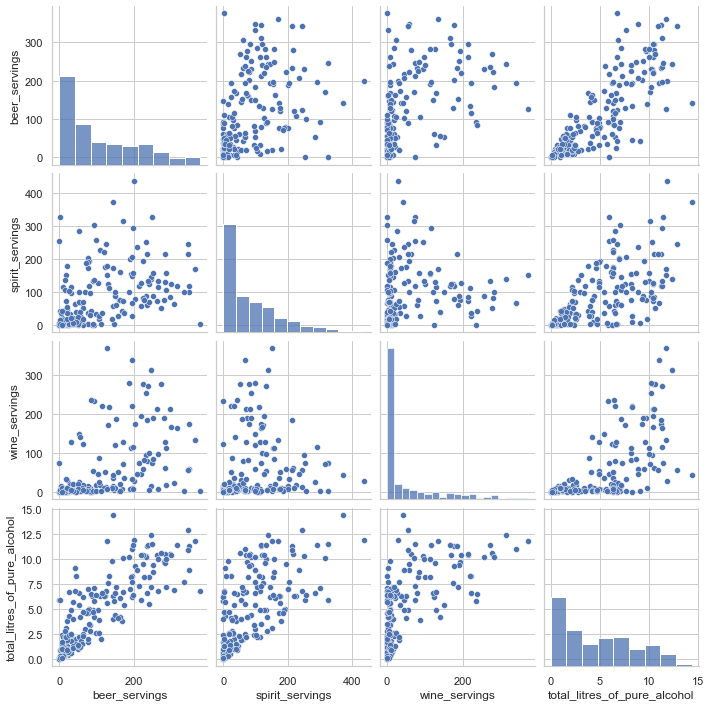

In [13]:
# 시각화 라이브러리 seaborn 이용, 각 컬럼간의 scatter plot 출력
sns.set(style='whitegrid', context='notebook')
sns.pairplot(drinks[cols], height=2.5)
plt.show()

In [14]:
drinks.head(2)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU


In [16]:
# 파생변수 생성 -> 총 술 소비량 -> beer + spirit + wine : 컬럼의 이름은 total_servings

# 술 소비량 대비 알콜 비율 컬럼 -> total_litres_of_pure_alcohol / total_servings
#  : 컬럼의 이름은 alcohol_rate로 지정
# 값이 존재하지 않는 경우는 0으로 대체

drinks['total_servings'] = drinks['beer_servings'] + drinks['spirit_servings'] + drinks['wine_servings']
drinks['total_servings']

0        0
1      275
2       39
3      695
4      319
      ... 
188    436
189    114
190      6
191     55
192     86
Name: total_servings, Length: 193, dtype: int64

In [18]:
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']
drinks['alcohol_rate']

0           NaN
1      0.017818
2      0.017949
3      0.017842
4      0.018495
         ...   
188    0.017661
189    0.017544
190    0.016667
191    0.045455
192    0.054651
Name: alcohol_rate, Length: 193, dtype: float64

In [20]:
drinks['alcohol_rate'].isna().sum()

13

In [22]:
drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0)

In [23]:
drinks['alcohol_rate'].isna().sum()

0

In [29]:
# 나라별 얼마나 독한 술을 먹는가 출력
country_rank = drinks[['country', 'alcohol_rate']]
country_rank_sort = country_rank.sort_values('alcohol_rate', ascending=False)

In [30]:
import numpy as np

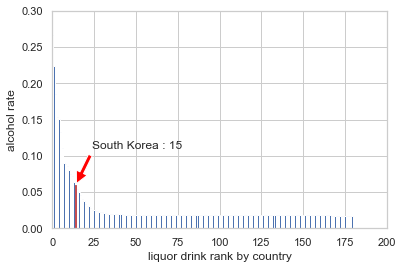

In [40]:
# 국가별 순위 정보를 그래프로 표시
# 바형 그래프 출력
x = np.arange(len(country_rank_sort))
y = country_rank_sort['alcohol_rate']
country_list = country_rank_sort['country'].tolist()
bar_list = plt.bar(x, y)
bar_list[country_list.index('South Korea')].set_color('r')
plt.ylabel('alcohol rate')
plt.xlabel('liquor drink rank by country')
plt.axis([0, 200, 0, 0.3])

korea_rank = country_list.index('South Korea')
korea_alc_rate = country_rank_sort[country_rank_sort['country'] == 'South Korea']['alcohol_rate'].values[0]

plt.annotate('South Korea : ' + str(korea_rank + 1),
            xy = (korea_rank, korea_alc_rate),
            xytext = (korea_rank + 10, korea_alc_rate + 0.05),
            arrowprops = dict(facecolor = 'red', shrink = 0.05))
            # 화살표 표시하는 작업
            
#plt.bar(x, y)
plt.show()